# Programming Assignment #3 Clustering

## Student Details

When submitting, fill your name and ID in this cell. Note that this is a markdown cell. 

Student Name and ID: Shereen Hasan 1001437130

## Rules

1. Work is to be done individually
2. Any cheating including plagiarism, collusion will be reported to the corresponding UTA’ s instance
3. If using any resource (books, internet), please make sure that you cite it.

## Assignment Details

The purpose of this assignment is to cluster drug users using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.

You will be using the same dataset that you used in assignment 2. However, this time we provided the class labels and the dataset is given in a csv file. O indicates NOUSER and 1 indicates USER.

You need to submit this ipython file after renaming it with your NetId. 

## Required Python Packages 

In [112]:
# Import required Python packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [113]:
excel_file = 'drug_users.csv'
FileData = pd.read_csv(excel_file)
FileData.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,CLASS
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10, and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task.

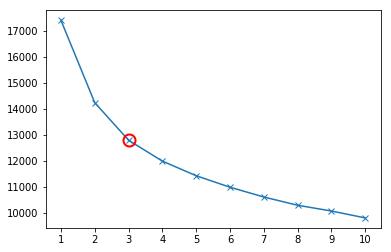

In [129]:
#########################begin code for Task 1-a
cluster_range = range(1,11)
plt.xticks(range(1,11))
cluster_errors = []
X_FileData = FileData[FileData.columns[:-1]]
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X_FileData)
    cluster_errors.append(clusters.inertia_)

plt.plot( cluster_range,cluster_errors, marker = "x" )
plt.plot(3, cluster_errors[2], marker='o', markersize=12,markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
 
#########################end code for Task 1-a

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 75% of the dataset for training and 25% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [115]:
###################begin code for Task 1-b-1: Split the dataset 75% for training and 25% for testing
X = FileData[FileData.columns[:-1]]
Y= FileData[FileData.columns[-1]]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

###################end code for Task 1-b-1

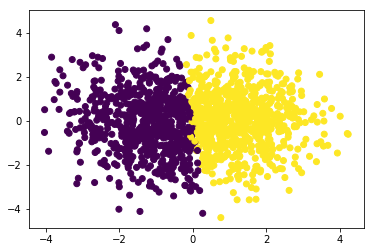

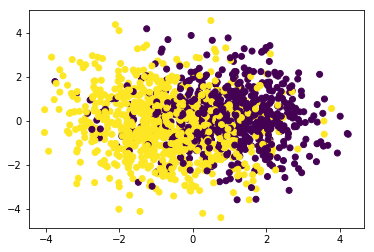

In [116]:
###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
clusters =KMeans(n_clusters=2, random_state=0)

Clus_ind = clusters.fit_predict(x_train)
# Model and fit the data to the PCA model
X_train_pca =PCA(n_components=2).fit_transform(x_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.scatter(x,y,c=Clus_ind)
plt.show()
################


plt.scatter(x,y,c=y_train)
plt.show()
###################end code for Task 1-b-2

Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

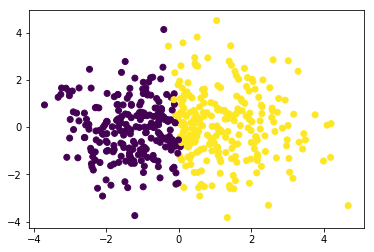

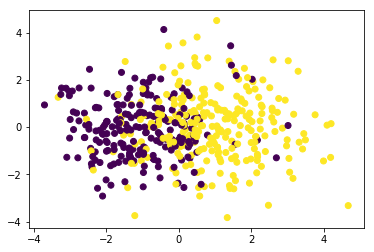

In [117]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 
clusters_test =KMeans(n_clusters=2, random_state=0)

Clus_index2 = clusters_test.fit_predict(x_test)
# Model and fit the data to the PCA model
X_test_pca =PCA(n_components=2).fit_transform(x_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
plt.scatter(x,y,c=Clus_index2)
plt.show()
plt.scatter(x,y,c=y_test)
plt.show()

###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [118]:
###################begin code for Task 1-b-4: Print out a confusion matrix

print(confusion_matrix(y_test,Clus_index2))
###################end code for Task 1-b-4

[[178  41]
 [ 50 203]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [119]:
###################begin code for Task 2-a: 
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train


calc_cos = pairwise_distances(x_train, metric='cosine')
calc_euc = pairwise_distances(x_train, metric='euclidean')
calc_man = pairwise_distances(x_train, metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
CompCos = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='complete')
pred_cos= CompCos.fit_predict(calc_cos)
f1_Cos = f1_score(y_train,pred_cos)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
Compeuc = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='complete')
pred_euc= Compeuc.fit_predict(calc_euc)
f1_euc = f1_score(y_train,pred_euc)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
CompMan = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='complete')
pred_Man= CompMan.fit_predict(calc_man)
f1_Man = f1_score(y_train,pred_Man)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
CompCosA = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='average')
pred_cosA= CompCosA.fit_predict(calc_cos)
f1_CosA = f1_score(y_train,pred_cosA)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
CompeucA = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='average')
pred_eucA= CompeucA.fit_predict(calc_euc)
f1_eucA = f1_score(y_train,pred_eucA)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
CompManA = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='average')
pred_ManA= CompManA.fit_predict(calc_man)
f1_ManA = f1_score(y_train,pred_ManA)

print("F1-score for complete linkage + cosine",f1_Cos )
print("F1-score for complete linkage + euclidean", f1_euc)
print("F1-score for complete linkage + manhattan", f1_Man)
print("F1-score for average linkage + cosine", f1_CosA)
print("F1-score for average linkage + euclidean", f1_eucA)
print("F1-score for average linkage + manhattan", f1_ManA)

###################end code for Task 2-a

F1-score for complete linkage + cosine 0.573529411764706
F1-score for complete linkage + euclidean 0.5589958158995816
F1-score for complete linkage + manhattan 0.12105263157894737
F1-score for average linkage + cosine 0.3165195460277428
F1-score for average linkage + euclidean 0.0024906600249066007
F1-score for average linkage + manhattan 0.002515723270440252


 Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

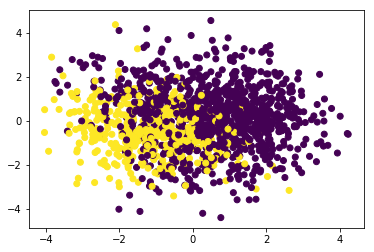

In [120]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labelsmax
# Visualize the predicted training labels versus actual training labels. 
from sklearn.decomposition import PCA


max_func = {'calc_cos':f1_Cos,'calc_euc':f1_euc,'calc_man':f1_Man,'calc_cosA':f1_CosA,'calc_eucA':f1_eucA,'calc_manA':f1_ManA}
best_perf_model = max(max_func,key=max_func.get)

if best_perf_model == 'calc_cos':
    max_func_val = pred_cos
    
elif best_perf_model == 'calc_cosA':
    max_func_val = pred_cosA

elif best_perf_model == 'calc_euc':
    max_func_val = pred_euc
    
elif best_perf_model == 'calc_eucA':
    max_func_val = pred_eucA
    
elif best_perf_model == 'calc_man':
    max_func_val = pred_Man

elif best_perf_model == 'calc_manA':
    max_func_val = pred_ManA


# Model and fit the data to the PCA model
X_train_pca =PCA(n_components=2).fit_transform(x_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.scatter(x,y,c=max_func_val)
plt.show()

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

[1 1 1 ... 0 0 0]
F1-score for complete linkage + cosine 0.5330606680299932
F1-score for complete linkage + euclidean 0.5794813979706877
F1-score for complete linkage + manhattan 0.2565959648215209
F1-score for average linkage + cosine 0.7023603914795625
F1-score for average linkage + euclidean 0.0038204393505253107
F1-score for average linkage + manhattan 0.0
Agglomerative labels


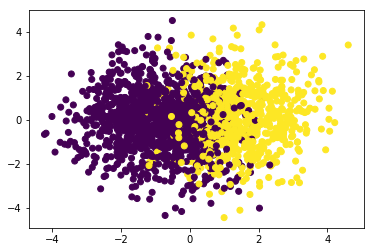

PCA


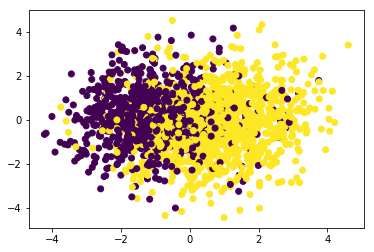

Kmeans


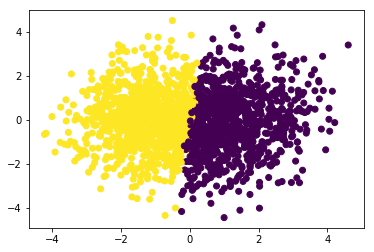

In [121]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
clusters1 =KMeans(n_clusters=2, random_state=0)
Clus_ind2 = clusters.fit_predict(X_FileData)
print(Clus_ind2)


### Agglomerative Clustering
# Calculate pairwise distance matrix for X
data = X_FileData
calc_cos = pairwise_distances(data, metric='cosine')
calc_euc = pairwise_distances(data, metric='euclidean')
calc_man = pairwise_distances(data, metric='manhattan')
# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
CompCos = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='complete')
pred_cos= CompCos.fit_predict(calc_cos)
f1_Cosx = f1_score(Y,pred_cos)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
Compeuc = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='complete')
pred_euc= Compeuc.fit_predict(calc_euc)
f1_eucx = f1_score(Y,pred_euc)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
CompMan = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='complete')
pred_Man= CompMan.fit_predict(calc_man)
f1_Manx = f1_score(Y,pred_Man)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
CompCosA = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='average')
pred_cosA= CompCosA.fit_predict(calc_cos)
f1_CosAx = f1_score(Y,pred_cosA)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
CompeucA = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='average')
pred_eucA= CompeucA.fit_predict(calc_euc)
f1_eucAx = f1_score(Y,pred_eucA)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
CompManA = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='average')
pred_ManA= CompManA.fit_predict(calc_man)
f1_ManAx = f1_score(Y,pred_ManA)

print("F1-score for complete linkage + cosine",f1_Cosx )
print("F1-score for complete linkage + euclidean", f1_eucx)
print("F1-score for complete linkage + manhattan", f1_Manx)
print("F1-score for average linkage + cosine", f1_CosAx)
print("F1-score for average linkage + euclidean", f1_eucAx)
print("F1-score for average linkage + manhattan", f1_ManAx)

### Visualize Clusters
max_func = {'calc_cos':f1_Cosx,'calc_euc':f1_eucx,'calc_man':f1_Manx,'calc_cosA':f1_CosAx,'calc_eucA':f1_eucAx,'calc_manA':f1_ManAx}
best_perf_model = max(max_func,key=max_func.get)

if best_perf_model == 'calc_cos':
    max_func_val = pred_cos
    
elif best_perf_model == 'calc_cosA':
    max_func_val = pred_cosA

elif best_perf_model == 'calc_euc':
    max_func_val = pred_euc
    
elif best_perf_model == 'calc_eucA':
    max_func_val = pred_eucA
    
elif best_perf_model == 'calc_man':
    max_func_val = pred_Man

elif best_perf_model == 'calc_manA':
    max_func_val = pred_ManA


# Model and fit the data to the PCA model
X_train_pca =PCA(n_components=2).fit_transform(X_FileData)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
print("Agglomerative labels")
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.scatter(x,y,c=max_func_val)
plt.show()

print("PCA")
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.scatter(x,y,c=Y)
plt.show()
print("Kmeans")
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.scatter(x,y,c=Clus_ind2)
plt.show()


###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering¶

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model.

In [122]:
###################begin code for Task 3-b


print("Confusion matrix:-\n")
k_Conf = confusion_matrix(Y,Clus_ind2)
a_Conf = confusion_matrix(Y,max_func_val)
print("K_means Confusion\n :",k_Conf)
print("Agglomerative Confusion \n",a_Conf)

print("\nF1 Score:-\n")
k_Score = f1_score(Y,Clus_ind2)
a_Score = f1_score(Y,max_func_val)
print("K_means Score \n :",k_Score)
print("Agglomerative Score \n",a_Score)

print("\nPrecision:-\n")
K_Prec = precision_score(Y,Clus_ind2)
A_Prec = precision_score(Y,max_func_val)
print("K_means Precision : \n",K_Prec)
print("Agglomerative Precision: \n",A_Prec)


print("\nRecall:-\n")
k_Recall = recall_score(Y,Clus_ind2)
a_Recall = recall_score(Y,max_func_val)
print("K_means Recall : \n",k_Recall)
print("Agglomerative Recall: \n",a_Recall)




###################end code for Task 3-b

Confusion matrix:-

K_means Confusion
 : [[157 683]
 [773 272]]
Agglomerative Confusion 
 [[758  82]
 [435 610]]

F1 Score:-

K_means Score 
 : 0.27199999999999996
Agglomerative Score 
 0.7023603914795625

Precision:-

K_means Precision : 
 0.2848167539267016
Agglomerative Precision: 
 0.8815028901734104

Recall:-

K_means Recall : 
 0.2602870813397129
Agglomerative Recall: 
 0.583732057416268


## Grading 

Task 1: 40 points

--> Task 1-a: 10 points

--> Task 1-b: 30 points

    Task 1-b-1: 5 points
    
    Task 1-b-2: 10 points
    
    Task 1-b-3: 10 points
    
    Task 1-b-4: 5 points
    
Task 2: 40 points

--> Task 2-a: 30 points

--> Task 2-b: 10 points


Task 3: 20 points

--> Task 3-a: 10 points

--> Task 3-b: 10 points